# BCI Competition III Dataset 2 analysis

In [1]:
import os
import numpy as np
import mne
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from matplotlib import pyplot as plt

## Load data:

In [2]:
DATA_FOLDER = 'data/BCI_Comp_III_Wads_2004'
FEATURE_LENGTH = 700

NUM_CHANNELS = 64
SAMPLING_FREQ = 240

VAL_SPLIT = 0.3

TEST_LABELS_A = 'WQXPLZCOMRKO97YFZDEZ1DPI9NNVGRQDJCUVRMEUOOOJD2UFYPOO6J7LDGYEGOA5VHNEHBTXOO1TDOILUEE5BFAEEXAW_K4R3MRU'
TEST_LABELS_B = 'MERMIROOMUHJPXJOHUVLEORZP3GLOO7AUFDKEFTWEOOALZOP9ROCGZET1Y19EWX65QUYU7NAK_4YCJDVDNGQXODBEV2B5EFDIDNR'

L_FREQ = .4
H_FREQ = 10

matrix = [
    'abcdef',
    'ghijkl',
    'mnopqr',
    'stuvwx',
    'yz1234',
    '567879_'
]

matrix_t = [''.join(i) for i in zip(*matrix)]

In [3]:
def extract_features(signal, flashing, stim):
    signal = signal.astype('double').reshape(-1, 64, signal.shape[1])
    signal = signal.swapaxes(1, 2).reshape(-1, 64)
    flashing = flashing.T.reshape(-1)
    stim = stim.T.reshape(-1)

    data = []
    labels = []
    sample_length = (FEATURE_LENGTH * SAMPLING_FREQ) // 1000

    for i in range(len(signal)):
        if flashing[i] and (i == 0 or not flashing[i - 1]) and i + sample_length <= len(signal):
            data.append(signal[i: i + sample_length])
            labels.append(stim[i])

    data = np.asarray(data)
    labels = np.asarray(labels)

    data = data.swapaxes(1, 2)

    return data, labels

def load_data(subject):
    train_signal = np.loadtxt(os.path.join(DATA_FOLDER, f'{subject}_Train_Signal.txt'))
    train_flashing = np.loadtxt(os.path.join(DATA_FOLDER, f'{subject}_Train_Flashing.txt'))
    train_stim_type = np.loadtxt(os.path.join(DATA_FOLDER, f'{subject}_Train_StimulusType.txt'))

    test_signal = np.loadtxt(os.path.join(DATA_FOLDER, f'{subject}_Test_Signal.txt'))
    test_flashing = np.loadtxt(os.path.join(DATA_FOLDER, f'{subject}_Test_Flashing.txt'))
    test_stim_code = np.loadtxt(os.path.join(DATA_FOLDER, f'{subject}_Test_StimulusCode.txt'))

    train_data, train_labels = extract_features(train_signal, train_flashing, train_stim_type)
    test_data, test_codes = extract_features(test_signal, test_flashing, test_stim_code)

    return train_data, train_labels, test_data, test_codes

train_data, train_labels, test_data, test_codes = load_data('Subject_A')

## Data visualization:

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
You seem to have overlapping epochs. Some event lines may be duplicated in the plot.
Using matplotlib as 2D backend.


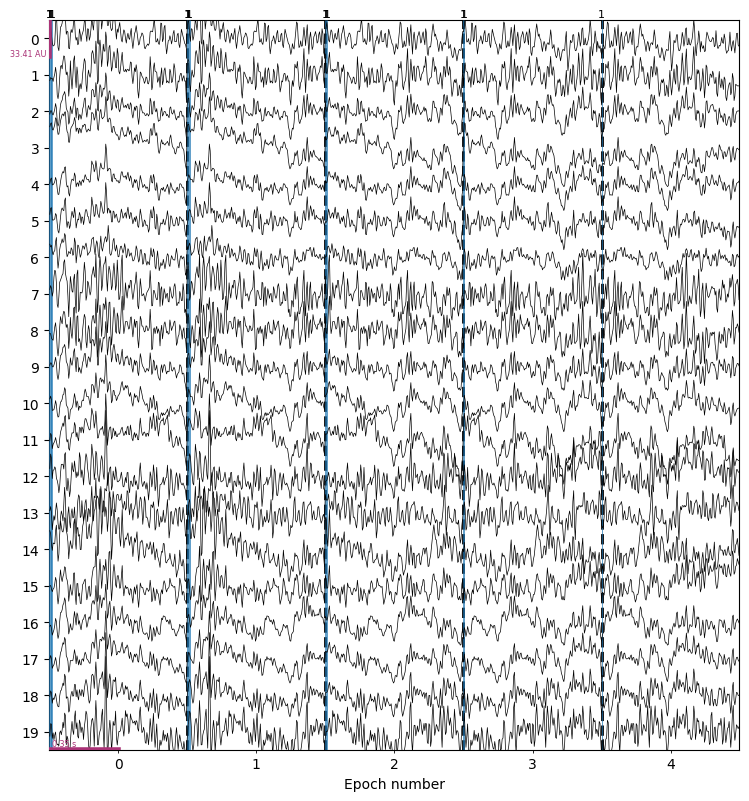

In [4]:
def plot_epochs(data, num_epochs):
    info = mne.create_info(NUM_CHANNELS, SAMPLING_FREQ)
    temp = mne.EpochsArray(data[:num_epochs], info)
    temp.plot(picks = 'all', show_scrollbars = False, events = True)

plot_epochs(train_data, 5)

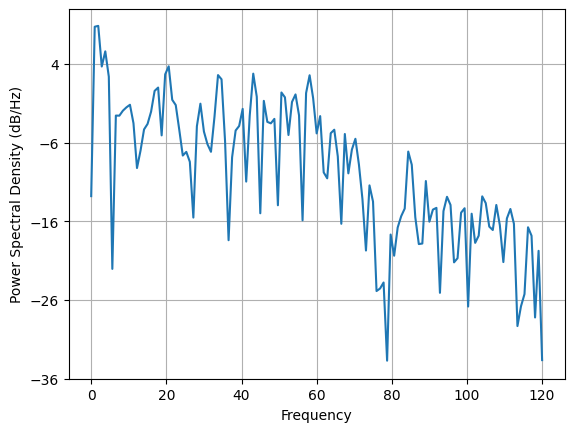

In [5]:
freq, psd = plt.psd(train_data[0][0], Fs = SAMPLING_FREQ, noverlap = 50)
plt.show()

## Pre-processing:

Not setting metadata
15300 matching events found
No baseline correction applied
0 projection items activated
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 0.4 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.40
- Lower transition bandwidth: 0.40 Hz (-6 dB cutoff frequency: 0.20 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1981 samples (8.254 s)



/tmp/ipykernel_417935/2143317932.py:5: RuntimeWarning: filter_length (1981) is longer than the signal (168), distortion is likely. Reduce filter length or filter a longer signal.
  epochs = epochs.filter(l_freq = L_FREQ, h_freq = H_FREQ, picks = 'all')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.2s
[Parallel(

Not setting metadata
18000 matching events found
No baseline correction applied
0 projection items activated
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 0.4 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.40
- Lower transition bandwidth: 0.40 Hz (-6 dB cutoff frequency: 0.20 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1981 samples (8.254 s)



/tmp/ipykernel_417935/2143317932.py:5: RuntimeWarning: filter_length (1981) is longer than the signal (168), distortion is likely. Reduce filter length or filter a longer signal.
  epochs = epochs.filter(l_freq = L_FREQ, h_freq = H_FREQ, picks = 'all')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.2s
[Parallel(

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


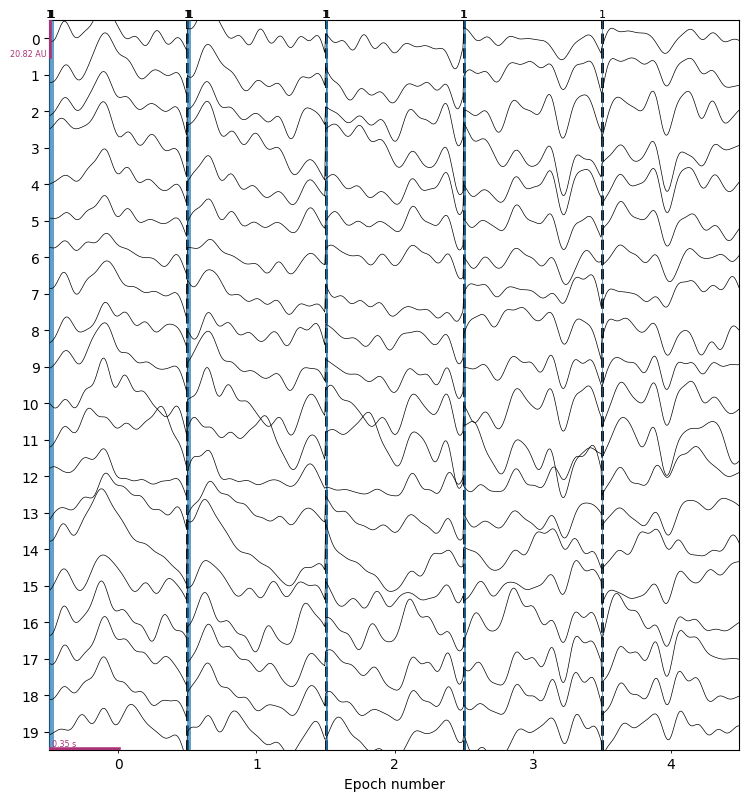

In [6]:
def preprocessing(data):
    info = mne.create_info(NUM_CHANNELS, SAMPLING_FREQ)
    epochs = mne.EpochsArray(data, info)

    epochs = epochs.filter(l_freq = L_FREQ, h_freq = H_FREQ, picks = 'all')
    return epochs.get_data()

train_data = preprocessing(train_data)
test_data = preprocessing(test_data)
plot_epochs(train_data, 5)

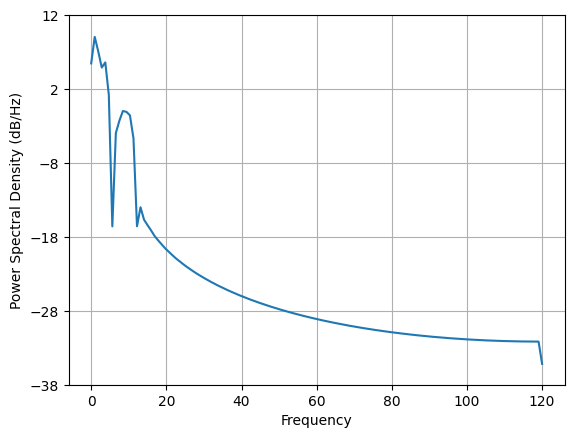

In [7]:
freq, psd = plt.psd(train_data[0][0], Fs = SAMPLING_FREQ, noverlap = 50)
plt.show()

In [8]:
choose_val = np.random.choice([0, 1], size = train_data.shape[0], p = [1 - VAL_SPLIT, VAL_SPLIT]).astype('bool')
choose_train = np.logical_not(choose_val)
train_data, val_data = train_data[choose_train], train_data[choose_val]
train_labels, val_labels = train_labels[choose_train], train_labels[choose_val]

## Train LDA:

In [ ]:
def train_lda(train_data, train_labels):
    train_data_copy = train_data.reshape(train_data.shape[0], -1)

    lda = LinearDiscriminantAnalysis()
    lda.fit(train_data_copy, train_labels)

    return lda

lda = train_lda(train_data, train_labels)

In [ ]:
def make_predictions(lda, val_data, val_labels, test_data, test_codes, text):
    val_data_copy = val_data.reshape(val_data.shape[0], -1)
    val_acc = lda.score(val_data_copy, val_labels)
    print(f'Val Accuracy: {val_acc * 100:.2f}%')

    test_data_copy = test_data.reshape(test_data.shape[0], -1)
    predictions = lda.predict_proba(test_data_copy)

    # Unscramble order of stimuli
    test_codes = test_codes.reshape(-1, 15, 12)
    idx = test_codes.argsort()
    static_idx = np.indices(idx.shape)

    predictions = predictions[:, 1]
    predictions = predictions.reshape(-1, 15, 12)
    predictions = predictions[static_idx[0], static_idx[1], idx]
    predictions = predictions.sum(axis = 1).argsort()

    cols = predictions[predictions <= 5].reshape(-1, 6)[:, -1]
    rows = predictions[predictions > 5].reshape(-1, 6)[:, -1]
    predicted_text = ''.join([matrix[i - 6][j] for i, j in zip(rows, cols)])
    predicted_text = predicted_text.upper()

    print(f'Predicted string: {predicted_text}')
    print(f'True string:      {text}')

    accuracy = sum([predicted_text[i] == text[i] for i in range(len(text))]) / len(text)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    return lda, accuracy

accuracy = make_predictions(lda, val_data, val_labels, test_data, test_codes, TEST_LABELS_A)